# Twitter sentiment

## Import Dependencies

In [1]:
from config import (consumer_key, consumer_secret, access_token, access_token_secret)

In [2]:
import  matplotlib.pyplot  as plt
import pandas as pd
import numpy as np
import tweepy
import json
import datetime
import time
import pprint as pprint
import requests
import json

%matplotlib inline

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

## Using mini-api for cryptocurrency for price changes

In [3]:
url = "https://min-api.cryptocompare.com/data/histominute?fsym=BTC&tsym=GBP&limit=300"
response = requests.get(url)
print(response.url)

https://min-api.cryptocompare.com/data/histominute?fsym=BTC&tsym=GBP&limit=300


## Create Twitter Authorization

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## Create module to run for twitter sentiments

In [5]:
def twitter_search():
    time_stamp = []
    #for x in range(1, 3):

        # Get all tweets from home feed
        
        
    public_tweets = api.search('BTCUSD', count=100, result_type="recent")
        
        # Loop through all tweets
    for tweet in public_tweets['statuses']:
    
           # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
    
            # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Text": tweet['text'],
                           })
            
        time = tweet['created_at']
        convert_time(time)
            
    plt.plot(compound_list, marker = 'o')
    plt.title(f"Sentiment Analysis of Tweets")
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Time stamp")
    #plt.xticks(np.arange(len(compound_list), step = 10), rotation=90)
    plt.tight_layout()
    plt.savefig('../Output/Sentiment_Analysis')

## Create Module to convert time stamp

In [6]:
def convert_time (time):
    time = datetime.datetime.strptime(time, "%a %b %d %H:%M:%S %z %Y").timestamp()
    time = datetime.datetime.fromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')
    time_stamp.append(time)

## Create module for recent 7 day price change

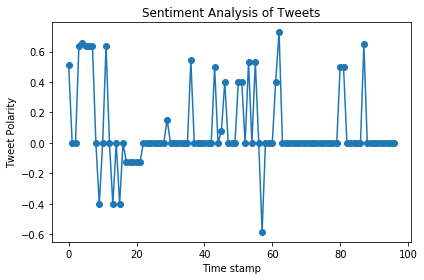

In [7]:
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
sentiments = []
time_stamp = []
    
twitter_search()